In [54]:
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import DataLoader, Dataset
from skimage import exposure
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [26]:
base_folder = 'C:/Users/user/OneDrive/Desktop/dataset/Dataset'

In [27]:
def read_image(base_folder: str, image_size: tuple[int, int]) -> tuple[np.array, np.array]:
    X = []
    y = []
    for label in os.listdir(base_folder):
        label_folder = os.path.join(base_folder, label)
        print(f"Currently reading {label_folder}")
        for image_name in tqdm(os.listdir(label_folder)):
            if image_name.split('.')[-1].lower() in ('jpg', 'png', 'gif'):
                image_path = os.path.join(label_folder, image_name)
                try:
                    image = Image.open(image_path)
                    image = image.convert('RGB')
                    image = image.resize(image_size)
                    X.append(np.array(image))
                    y.append(label)
                except Exception as e:
                    print(f"Error reading {image_path}: {str(e)}")
    X = np.array(X)
    y = np.array(y)
    return X, y


In [28]:
X, y = read_image(base_folder, (128, 128))

Currently reading C:/Users/user/OneDrive/Desktop/dataset/Dataset\cheetah


100%|██████████| 29/29 [00:00<00:00, 1063.30it/s]


Currently reading C:/Users/user/OneDrive/Desktop/dataset/Dataset\elephant


100%|██████████| 31/31 [00:00<00:00, 889.50it/s]


Currently reading C:/Users/user/OneDrive/Desktop/dataset/Dataset\iguana


100%|██████████| 31/31 [00:00<00:00, 1469.69it/s]


Currently reading C:/Users/user/OneDrive/Desktop/dataset/Dataset\jaguar


100%|██████████| 47/47 [00:00<00:00, 990.33it/s]


Currently reading C:/Users/user/OneDrive/Desktop/dataset/Dataset\komodo dragon


100%|██████████| 33/33 [00:00<00:00, 336.76it/s]


Currently reading C:/Users/user/OneDrive/Desktop/dataset/Dataset\lemur


100%|██████████| 41/41 [00:00<00:00, 827.18it/s]


Currently reading C:/Users/user/OneDrive/Desktop/dataset/Dataset\okapi


100%|██████████| 37/37 [00:00<00:00, 743.11it/s]


Currently reading C:/Users/user/OneDrive/Desktop/dataset/Dataset\orang utan


100%|██████████| 30/30 [00:00<00:00, 559.02it/s]


Currently reading C:/Users/user/OneDrive/Desktop/dataset/Dataset\panda


100%|██████████| 31/31 [00:00<00:00, 1059.70it/s]


Currently reading C:/Users/user/OneDrive/Desktop/dataset/Dataset\puma


100%|██████████| 28/28 [00:00<00:00, 467.10it/s]


Currently reading C:/Users/user/OneDrive/Desktop/dataset/Dataset\red panda


100%|██████████| 31/31 [00:00<00:00, 958.54it/s]


Currently reading C:/Users/user/OneDrive/Desktop/dataset/Dataset\tapirus


100%|██████████| 29/29 [00:00<00:00, 718.35it/s]


In [29]:
# Save the data to a pickle file
output_file = 'data.pickle'
with open(output_file, 'wb') as file:
    pickle.dump((X, y), file)

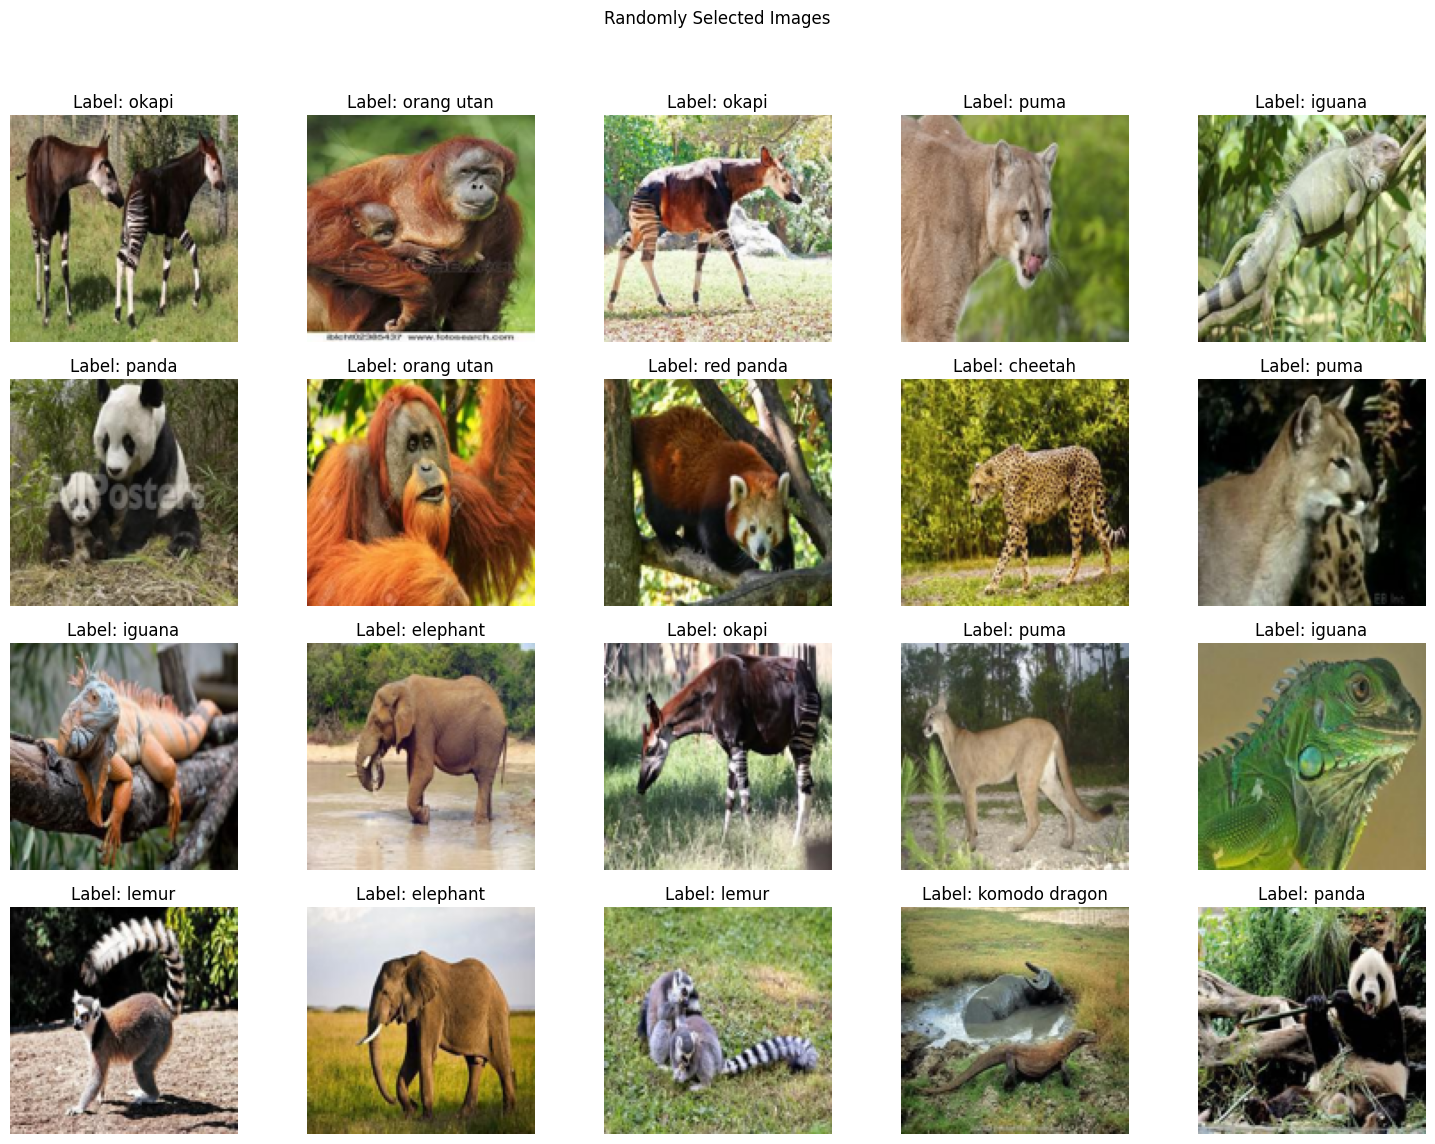

In [30]:
import matplotlib.pyplot as plt
import random

# Load the saved data from the pickle file
with open(output_file, 'rb') as file:
    X, y = pickle.load(file)

# Choose 20 random indices from the dataset
random_indices = random.sample(range(len(X)), 20)

# Plot the selected images
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
fig.suptitle('Randomly Selected Images')

for i, ax in zip(random_indices, axes.flatten()):
    ax.imshow(X[i])  # Assuming the images are grayscale
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [31]:
# Assuming you have already loaded X and y from your pickle file

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the ImageDataGenerator to your training data
datagen.fit(X_train)

# Define the number of augmented images to generate for each original image
num_augmented_images = 5  

# Generate augmented images and append them to X_train
augmented_X_train = []
augmented_y_train = []

for x, y in zip(X_train, y_train):
    x = np.expand_dims(x, axis=0)  # Add batch dimension
    for _ in range(num_augmented_images):
        augmented_img = datagen.flow(x, batch_size=1).next()[0]
        augmented_X_train.append(augmented_img.astype(np.uint8))  # Ensure the datatype is uint8
        augmented_y_train.append(y)

# Convert lists to arrays
augmented_X_train = np.array(augmented_X_train)
augmented_y_train = np.array(augmented_y_train)

# Concatenate augmented images with original X_train and y_train
X_train = np.concatenate([X_train, augmented_X_train], axis=0)
y_train = np.concatenate([y_train, augmented_y_train], axis=0)

# Shuffle the training data
X_train, y_train = shuffle(X_train, y_train)

# Now X_train and y_train contain augmented images along with original images


In [32]:

# Save y_train as pickle
with open('y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)

# Save y_test as pickle
with open('y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)


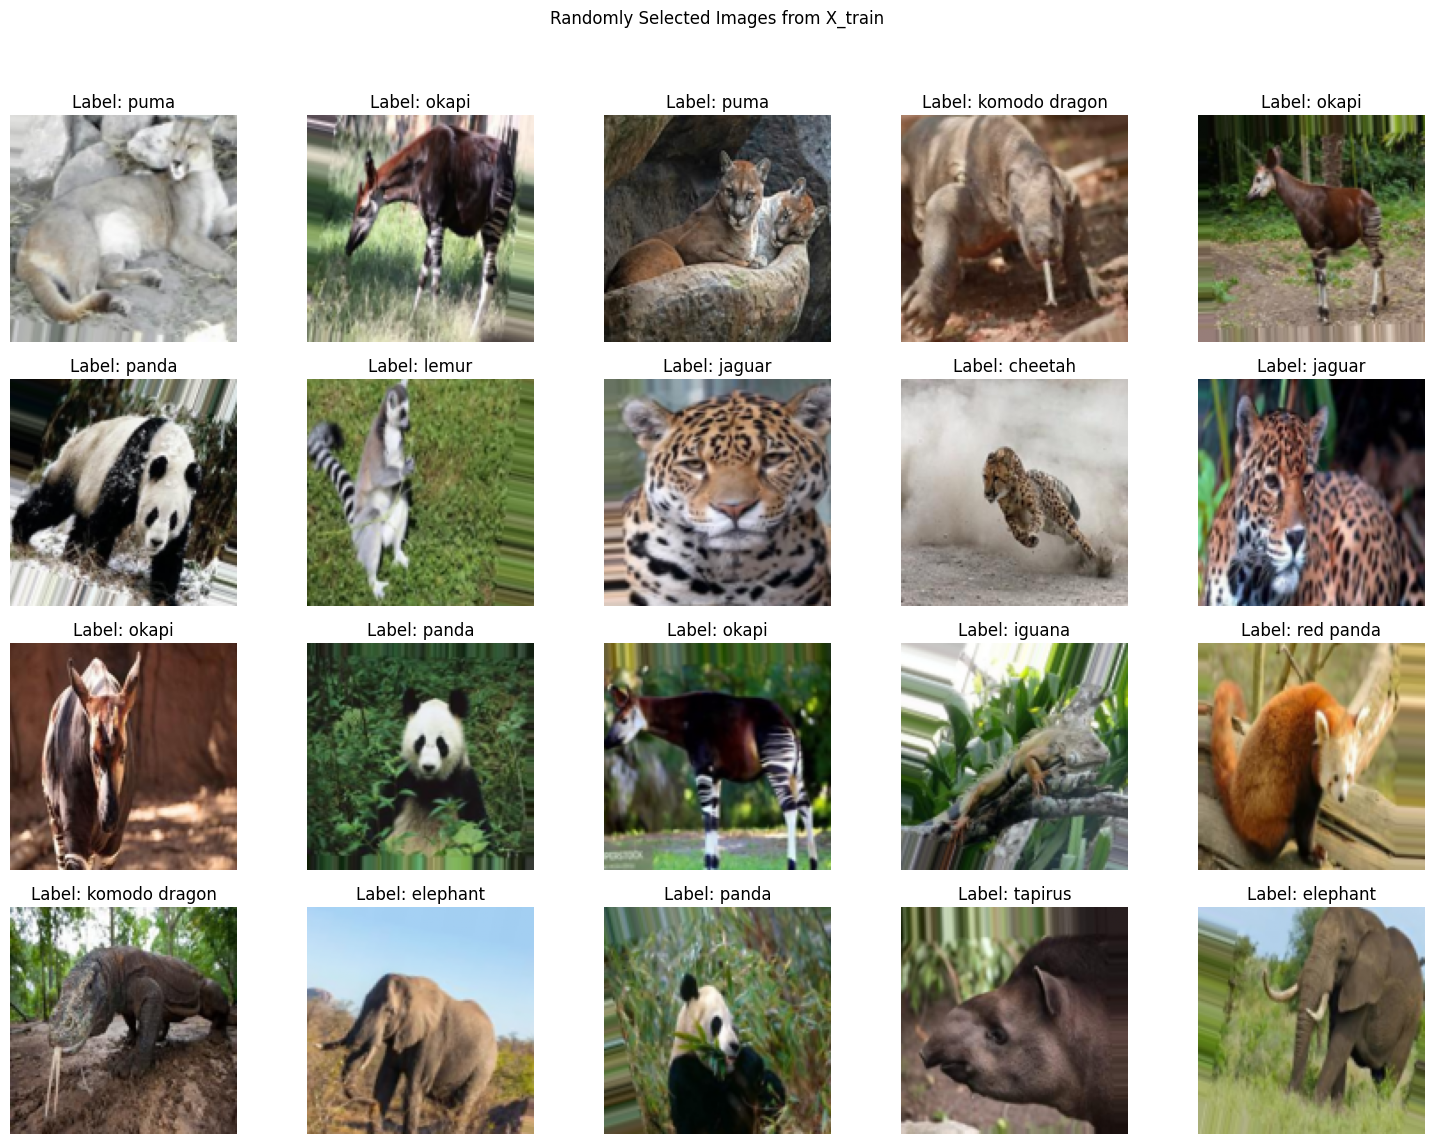

In [33]:


# Choose 20 random indices from the training set
random_indices = random.sample(range(len(X_train)), 20)

# Plot the selected images
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
fig.suptitle('Randomly Selected Images from X_train')

for i, ax in zip(random_indices, axes.flatten()):
    # Normalize the image to [0, 1] range if necessary
    if X_train[i].max() > 1:
        image = X_train[i] / 255.0
    else:
        image = X_train[i]
    ax.imshow(image)  # Assuming the images are RGB
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Feature Extraction using VGG16 on Training Set

In [34]:

# Convert images to PyTorch tensors with appropriate data type
X_tensor = torch.stack([torch.Tensor(img).permute(2, 0, 1).float() for img in X_train])

# Define a custom dataset
class CustomDataset(Dataset):
    def __init__(self, images, transform=None):
        self.images = images
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]

        if self.transform:
            image = self.transform(image)

        return image

# Transformations for data preprocessing
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
])

# Create an instance of the custom dataset
dataset = CustomDataset(images=X_tensor, transform=transform)

# Create DataLoader instances
data_loader = DataLoader(dataset, batch_size=32, shuffle=False)

# Load a pre-trained VGG16 model
pretrained_model = models.vgg16(pretrained=True)
model = nn.Sequential(*list(pretrained_model.children())[:-1])  # Remove the last fully connected layer

# Set the model to evaluation mode
model.eval()

# Extract features
features_list = []
with torch.no_grad():
    for images in data_loader:
        features = model(images)
        features_list.append(features)

# Concatenate features from different batches
all_features = torch.cat(features_list, dim=0)

# Flatten features to a 1D tensor if needed
flattened_features = all_features.view(all_features.size(0), -1)


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [35]:

# Save the variable as a pickle file
with open('all_vgg16.pkl', 'wb') as file:
    pickle.dump(all_features, file)

print("all_features saved as 'all_vgg16.pkl'")

# Save the variable as a pickle file
with open('flattened_vgg16.pkl', 'wb') as file:
    pickle.dump(flattened_features, file)

print("flattened_features saved as 'flattened_vgg16.pkl'")

all_features saved as 'all_vgg16.pkl'
flattened_features saved as 'flattened_vgg16.pkl'


# Feature extraction using VGG 16 on Testing Set

In [36]:
# Convert images to PyTorch tensors with appropriate data type
X_tensor = torch.stack([torch.Tensor(img).permute(2, 0, 1).float() for img in X_test])

# Define a custom dataset
class CustomDataset(Dataset):
    def __init__(self, images, transform=None):
        self.images = images
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]

        if self.transform:
            image = self.transform(image)

        return image

# Transformations for data preprocessing
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
])

# Create an instance of the custom dataset
dataset = CustomDataset(images=X_tensor, transform=transform)

# Create DataLoader instance
data_loader = DataLoader(dataset, batch_size=32, shuffle=False)

# Load a pre-trained VGG16 model
pretrained_model = models.vgg16(pretrained=True)
model = nn.Sequential(*list(pretrained_model.children())[:-1])  # Remove the last fully connected layer

# Set the model to evaluation mode
model.eval()

# Extract features
features_list = []
with torch.no_grad():
    for images in data_loader:
        features = model(images)
        features_list.append(features)

# Concatenate features from different batches
all_features = torch.cat(features_list, dim=0)

# Flatten features to a 1D tensor if needed
flattened_features = all_features.view(all_features.size(0), -1)


In [37]:
# Save the variable as a pickle file
with open('all_vgg16_testing.pkl', 'wb') as file:
    pickle.dump(all_features, file)

print("all_features saved as 'all_vgg16_testing.pkl'")

# Save the variable as a pickle file
with open('flattened_vgg16_testing.pkl', 'wb') as file:
    pickle.dump(flattened_features, file)

print("flattened_features saved as 'flattened_vgg16_testing.pkl'")

all_features saved as 'all_vgg16_testing.pkl'
flattened_features saved as 'flattened_vgg16_testing.pkl'


# Perform efficientNetB2 on Training Set

In [38]:

# Convert images to PyTorch tensors with appropriate data type
X_tensor = torch.stack([torch.Tensor(img).permute(2, 0, 1).float() for img in X_train])

# Define a custom dataset
class CustomDataset(Dataset):
    def __init__(self, images, transform=None):
        self.images = images
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]

        if self.transform:
            image = self.transform(image)

        return image

# Transformations for data preprocessing
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
])

# Create an instance of the custom dataset
dataset = CustomDataset(images=X_tensor, transform=transform)

# Create DataLoader instances
data_loader = DataLoader(dataset, batch_size=32, shuffle=False)

# Load a pre-trained EfficientNetB2 model
pretrained_model = models.efficientnet_b2(pretrained=True)
model = nn.Sequential(*list(pretrained_model.children())[:-1])  # Remove the last fully connected layer

# Set the model to evaluation mode
model.eval()

# Extract features
features_list = []
with torch.no_grad():
    for images in data_loader:
        features = model(images)
        features_list.append(features)

# Concatenate features from different batches
all_features = torch.cat(features_list, dim=0)

# Flatten features to a 1D tensor if needed
flattened_features = all_features.view(all_features.size(0), -1)


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B2_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [39]:

# Save the variable as a pickle file
with open('all_efficientnetb2.pkl', 'wb') as file:
    pickle.dump(all_features, file)

print("all_features saved as 'all_efficientnetb2.pkl'")

# Save the variable as a pickle file
with open('flattened_efficientnetb2.pkl', 'wb') as file:
    pickle.dump(flattened_features, file)

print("flattened_features saved as 'flattened_efficientnetb2.pkl'")

all_features saved as 'all_efficientnetb2.pkl'
flattened_features saved as 'flattened_efficientnetb2.pkl'


# Perform EfficientNetB2 on Testing Set

In [40]:
# Convert images to PyTorch tensors with appropriate data type
X_tensor = torch.stack([torch.Tensor(img).permute(2, 0, 1).float() for img in X_test])

# Define a custom dataset
class CustomDataset(Dataset):
    def __init__(self, images, transform=None):
        self.images = images
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]

        if self.transform:
            image = self.transform(image)

        return image

# Transformations for data preprocessing
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
])

# Create an instance of the custom dataset
dataset = CustomDataset(images=X_tensor, transform=transform)

# Create DataLoader instance
data_loader = DataLoader(dataset, batch_size=32, shuffle=False)

# Load a pre-trained EfficientNetB2 model
pretrained_model = models.efficientnet_b2(pretrained=True)
model = nn.Sequential(*list(pretrained_model.children())[:-1])  # Remove the last fully connected layer

# Set the model to evaluation mode
model.eval()

# Extract features
features_list = []
with torch.no_grad():
    for images in data_loader:
        features = model(images)
        features_list.append(features)

# Concatenate features from different batches
all_features = torch.cat(features_list, dim=0)

# Flatten features to a 1D tensor if needed
flattened_features = all_features.view(all_features.size(0), -1)


In [41]:
# Save the variable as a pickle file
with open('all_efficientnetb2_testing.pkl', 'wb') as file:
    pickle.dump(all_features, file)

print("all_features saved as 'all_efficientnetb2_testing.pkl'")

# Save the variable as a pickle file
with open('flattened_efficientnetb2_testing.pkl', 'wb') as file:
    pickle.dump(flattened_features, file)

print("flattened_features saved as 'flattened_efficientnetb2_testing.pkl'")

all_features saved as 'all_efficientnetb2_testing.pkl'
flattened_features saved as 'flattened_efficientnetb2_testing.pkl'


# Perform Training Using extracted feature

## Load and Combine Extracted Feature

In [42]:
# Load flattened features from the second pickle file
with open('flattened_vgg16.pkl', 'rb') as file:
    X_train_extracted1 = pickle.load(file)

# Load flattened features from the second pickle file
with open('flattened_vgg16_testing.pkl', 'rb') as file:
    X_test_extracted1 = pickle.load(file)

# Load flattened features from the second pickle file
with open('flattened_efficientnetb2.pkl', 'rb') as file:
    X_train_extracted2 = pickle.load(file)

# Load flattened features from the second pickle file
with open('flattened_efficientnetb2_testing.pkl', 'rb') as file:
    X_test_extracted2 = pickle.load(file)

X_train_extracted = np.concatenate((X_train_extracted1, X_train_extracted2), axis=1)
X_test_extracted = np.concatenate((X_test_extracted1, X_test_extracted2), axis=1)


In [43]:
# Encode string labels into numerical format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Use Lazy Predict to Identify the Best Performance for ML Model

In [73]:
from lazypredict.Supervised import LazyClassifier
# Create LazyClassifier and fit on the training data
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train_extracted, X_test_extracted, y_train, y_test)

# Display the models and their performance
print(models)

 97%|█████████▋| 28/29 [31:33<01:13, 73.23s/it]  

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.664069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3549029
[LightGBM] [Info] Number of data points in the train set: 1908, number of used features: 24339
[LightGBM] [Info] Start training from score -2.626557
[LightGBM] [Info] Start training from score -2.717529
[LightGBM] [Info] Start training from score -2.626557
[LightGBM] [Info] Start training from score -2.151133
[LightGBM] [Info] Start training from score -2.466215
[LightGBM] [Info] Start training from score -2.235691
[LightGBM] [Info] Start training from score -2.296315
[LightGBM] [Info] Start training from score -2.543176
[LightGBM] [Info] Start training from score -2.503955
[LightGBM] [Info] Start training from score -2.543176
[LightGBM] [Info] Start training from score -2.466215
[LightGBM] [Info] Start training from score -2.871680
[LightGBM] [Warning] No further splits with positive gain,

100%|██████████| 29/29 [39:08<00:00, 81.00s/it] 


                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
PassiveAggressiveClassifier        0.85               0.86    None      0.85   
CalibratedClassifierCV             0.84               0.86    None      0.83   
LinearSVC                          0.84               0.85    None      0.84   
Perceptron                         0.82               0.82    None      0.82   
LogisticRegression                 0.80               0.81    None      0.80   
BernoulliNB                        0.82               0.80    None      0.81   
ExtraTreesClassifier               0.80               0.79    None      0.80   
RidgeClassifierCV                  0.79               0.79    None      0.79   
RidgeClassifier                    0.79               0.79    None      0.79   
LinearDiscriminantAnalysis         0.75               0.78    None      0.75   
SGDClassifier                      0.78 

# Based on Results, perform random search on LinearSVC

In [50]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter grid
param_grid = {
    'C': uniform(loc=0, scale=10),  # Uniform distribution for parameter C
    'loss': ['hinge', 'squared_hinge'],  # Loss function
    'tol': [1e-3, 1e-4, 1e-5],  # Tolerance for stopping criteria
    'class_weight': [None, 'balanced'],  # Set the parameter C of class i to class_weight[i]*C for LinearSVC
    'dual': [True]  

}

# Initialize LinearSVC classifier
linear_svc = LinearSVC()

# Initialize RandomizedSearchCV
linear_svc_random_search = RandomizedSearchCV(estimator=linear_svc, param_distributions=param_grid, n_iter=50, cv=5, random_state=42)

# Fit RandomizedSearchCV
linear_svc_random_search.fit(X_train_extracted, y_train)

# Print the best parameters found
print("Best parameters found:")
print(linear_svc_random_search.best_params_)

# Get the best parameters
best_params = linear_svc_random_search.best_params_

# Initialize LinearSVC with the best parameters
best_linear_svc = LinearSVC(**best_params)

# Fit the model with the best parameters on the entire training data
best_linear_svc.fit(X_train_extracted, y_train)

# Predictions on the test set
y_pred = best_linear_svc.predict(X_test_extracted)


Best parameters found:
{'C': 3.745401188473625, 'class_weight': None, 'dual': True, 'loss': 'hinge', 'tol': 1e-05}


In [51]:
print(linear_svc_random_search.best_params_)

{'C': 3.745401188473625, 'class_weight': None, 'dual': True, 'loss': 'hinge', 'tol': 1e-05}


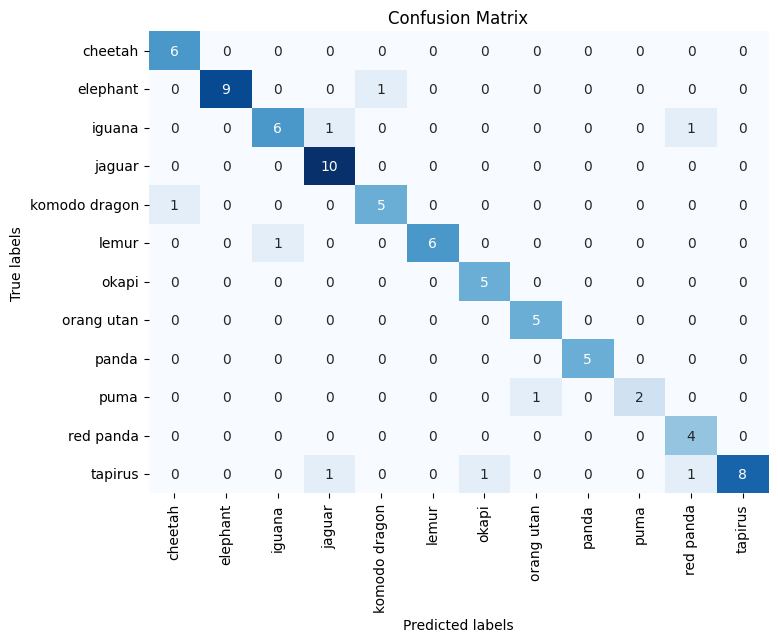

Classification Report:
               precision    recall  f1-score   support

      cheetah       0.86      1.00      0.92         6
     elephant       1.00      0.90      0.95        10
       iguana       0.86      0.75      0.80         8
       jaguar       0.83      1.00      0.91        10
komodo dragon       0.83      0.83      0.83         6
        lemur       1.00      0.86      0.92         7
        okapi       0.83      1.00      0.91         5
   orang utan       0.83      1.00      0.91         5
        panda       1.00      1.00      1.00         5
         puma       1.00      0.67      0.80         3
    red panda       0.67      1.00      0.80         4
      tapirus       1.00      0.73      0.84        11

     accuracy                           0.89        80
    macro avg       0.89      0.89      0.88        80
 weighted avg       0.90      0.89      0.89        80



In [55]:
import seaborn as sns
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))